## Titanic Machine Learning using XG Boost

If you happen to find this notebook useful then please do upvote.
And any critcisim or feedback is very apprecitaed

### Let us first import all the  dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette('viridis')
print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv('train.csv')
df.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S

In [3]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

###    Let us handle the missing values first so we can propely build a model on it

In [4]:
# Let's check how many null values
print('Sum of NaN values in each column\n')
print(df.isnull().sum())
print('_____________________________________')

print('%age of NaN values in each column\n')
print(df.isnull().sum() / len(df['Age']) * 100)

Sum of NaN values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
_____________________________________
%age of NaN values in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


<AxesSubplot:>

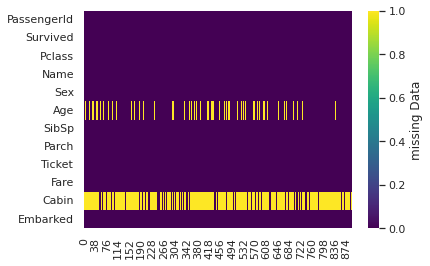

In [5]:
# We can see that more than 77% of the Cabin column if filled with Nan Values

# df[df['Cabin'] == np.nan].head(7) -- To view the NaN values, you won't se anything cause its not there XD


# Let's visualize the NaN values for the normies out there

sns.heatmap(df.isnull().transpose(),cmap="viridis", cbar_kws={"label": 'missing Data'})


<AxesSubplot:>

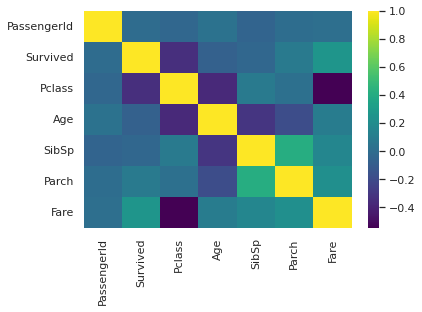

In [6]:
# Let us view the co-relation b/w the fields
sns.heatmap(df.corr(), cmap="viridis")

In [7]:
# let's drop the Cabin column as it won't be of much help for our model

newDf = df.drop('Cabin', axis=1)
newDf.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q  
6      0             17463  51.8625        S

In [8]:
print(f'Old Data frame size : {df.shape} New DataFame Size {newDf.shape}')

Old Data frame size : (891, 12) New DataFame Size (891, 11)


In [9]:
# Now lets' impute the missing values of the Age column
# Drop the Rows with respect to the missing values of Cabin column


newDf['Age'] = newDf['Age'].fillna(newDf['Age'].mean())
newDf = newDf.dropna(axis=0, how='any')
print('No. of Missing values in the newDf DataFrame \n')
print(newDf.isnull().sum())

No. of Missing values in the newDf DataFrame 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [11]:
# Let's us compare the stats b/w the old Data set with missing values,
# and new DataSet with imputed values

print(f'Old DataSet Stats \n {df.describe()}')
print('______________________________________')
print(f'Old DataSet Stats \n {newDf.describe()}')

Old DataSet Stats 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
______________________________________
Old DataSet Stats 
   

### Let us do some visualization to better understand the co-relation of each data column

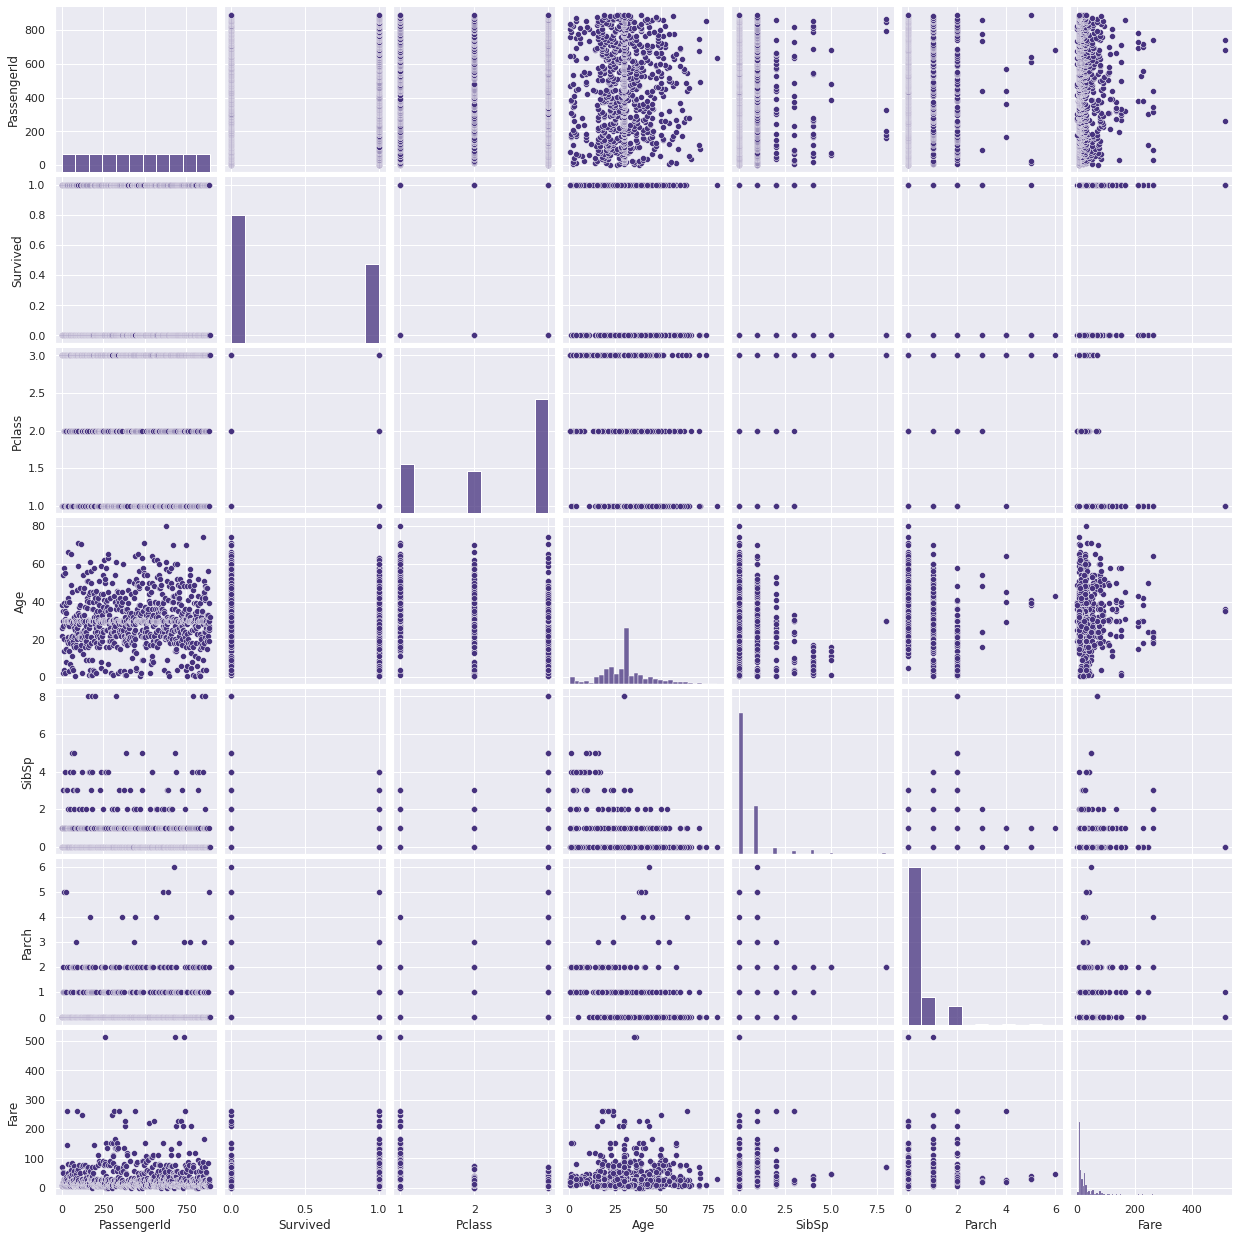

In [12]:

sns.pairplot(newDf)

Text(0.5, 1.0, 'Titanic Surviors by Gender')

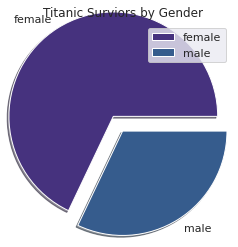

In [13]:
# Now let's see which gender had a higher likelyhood / chance of survival

# def percey(value, length)

# print(f'Total Men who Survived the accident : {newDf['Sex']')

# plt.pie(newDf[newDf['Sex'] and newDf['Survived'] == 1].value_counts(), labels= (newDf['Sex'].unique()), shadow=2.6)
# newDf['Sex'].value_counts(normalize=True)
survied = newDf[newDf['Survived'] == 1]['Sex'].value_counts()
victims = newDf[newDf['Survived'] == 0]['Sex'].value_counts()

plt.pie(survied,labels= ['female', 'male'],
        shadow=0.6,
        explode=[0.2, 0],
        radius=1.2,)
plt.legend()
plt.title('Titanic Surviors by Gender')

[[Text(0, 0, 'Did not Survive'), Text(1, 0, 'Survied')],
 Text(0.5, 1.0, 'Titanic Survival Data')]

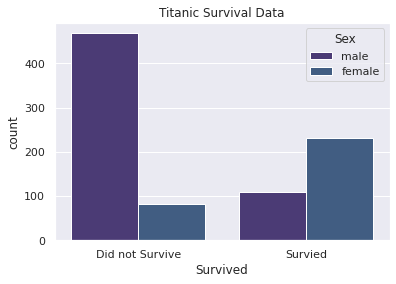

In [14]:
sns.countplot(data=newDf, x = 'Survived', hue='Sex',).set(xticklabels = ['Did not Survive', 'Survied'], title = 'Titanic Survival Data')

[Text(0.5, 1.0, 'Co - realation of Survival w.r.t Gender')]

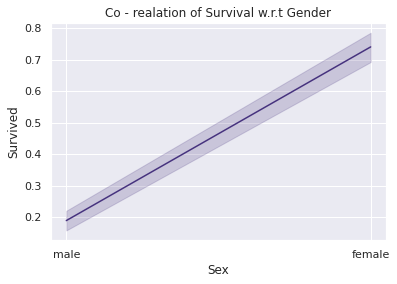

In [15]:
sns.lineplot(data=newDf, x = 'Sex', y ='Survived').set(title='Co - realation of Survival w.r.t Gender')


[Text(0.5, 1.0, 'Co - realation of Survival w.r.t Age')]

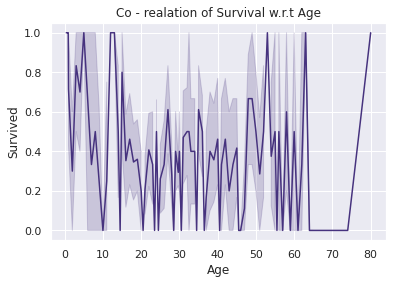

In [16]:
sns.lineplot(data = newDf, x = 'Age', y = 'Survived').set(title = 'Co - realation of Survival w.r.t Age')
# We can observe that elderly had a higher chance of survival


<AxesSubplot:xlabel='Pclass', ylabel='count'>

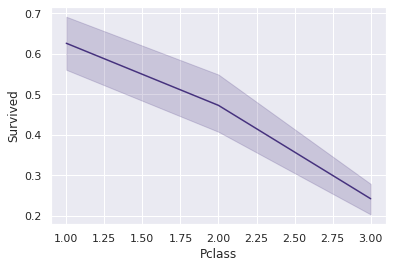

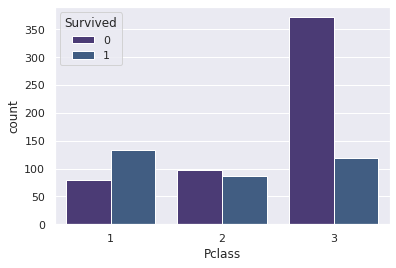

In [17]:
sns.lineplot(data=newDf, x = 'Pclass', y = 'Survived')
plt.figure()
# Notice here how People in the First class also had a higher chance of survival
sns.countplot(data=newDf, x ='Pclass', hue='Survived')

In [18]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


[Text(0.5, 1.0, 'Co-relatibility of Fare w.r.t Survival')]

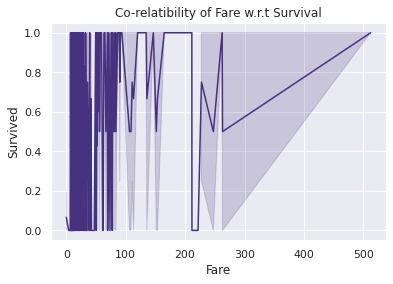

In [19]:
sns.lineplot(data=newDf, x = 'Fare', y= 'Survived').set(title = 'Co-relatibility of Fare w.r.t Survival')

# The graph is rather confusing so let's leave the Fare aside for now


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

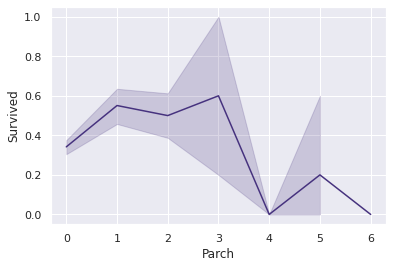

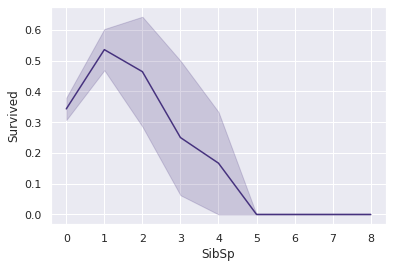

In [20]:
sns.lineplot(data=newDf, x = 'Parch', y= 'Survived')
plt.figure()
sns.lineplot(data=newDf, x = 'SibSp', y= 'Survived')


### Let's check for some outlier Data that could hinder the model's predictive performance

<AxesSubplot:>

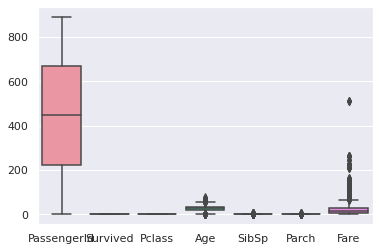

In [21]:
sns.boxplot(data=newDf)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

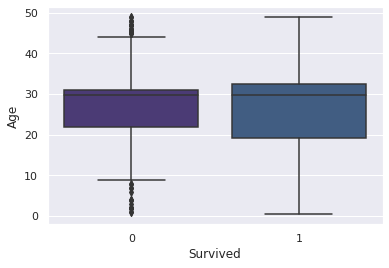

In [29]:
# Check if the Age has any outlier data
newDf = newDf[newDf['Age'] < 55]
sns.boxplot(data=newDf, y = 'Age', x = 'Survived')


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

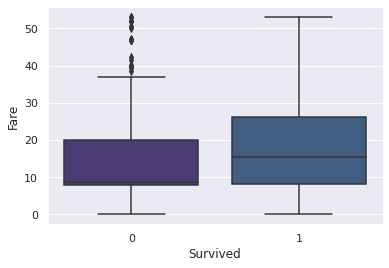

In [38]:
newDf = newDf[newDf['Fare'] <55]
sns.boxplot(data=newDf, x = 'Survived', y = 'Fare')

In [40]:
features = ['Age', 'Sex', "Pclass", "SibSp"]
x = newDf[features]
x['Sex'] = x['Sex'].map({'female': 0, 'male':1})
y = newDf['Survived']

# Let's split our dataset

xTrain, xTest, yTrain, yTest = train_test_split(x,y, random_state=200,test_size=0.2)


In [105]:
# Tune the model's parameters for more accurate prediction

model = XGBClassifier(booster = 'gbtree', n_estimators=350, learning_rate=0.7, colsample_bytree=0.4)
model.fit(xTrain, yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [106]:
preds = model.predict(xTest)

In [107]:
print(f'Accuracy score on Train Data-Set : {accuracy_score(model.predict(xTrain), yTrain)}')
print(f'Accuracy score on Train Data-Set : {accuracy_score(model.predict(xTest), yTest)}')
print(f'MSE : {mean_squared_error(preds, yTest)}')

Accuracy score on Train Data-Set : 0.855098389982111
Accuracy score on Train Data-Set : 0.7714285714285715
MSE : 0.22857142857142856


In [108]:
testDf = pd.read_csv('test.csv')
testDf.head(7)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
5  14.0      0      0     7538   9.2250   NaN        S  
6  30.0      0      0   330972   7.6292   NaN        Q

In [117]:
# Lets filter out to have the important features we have determined earlier

newTestDf = testDf[features]

In [118]:
# Check for NAN values in the test set
newTestDf.isnull().sum()

Age       86
Sex        0
Pclass     0
SibSp      0
dtype: int64

In [119]:
# Let us impute the missing values and proceed
newTestDf['Age'] = newTestDf['Age'].fillna(newTestDf['Age'].mean())
newTestDf['Sex'] = newTestDf['Sex'].map({'female': 0, 'male':1})
newTestDf.isnull().sum()

Age       0
Sex       0
Pclass    0
SibSp     0
dtype: int64

In [120]:
newTestDf.head(7)

Age  Sex  Pclass  SibSp
0  34.5    1       3      0
1  47.0    0       3      1
2  62.0    1       2      0
3  27.0    1       3      0
4  22.0    0       3      1
5  14.0    1       3      0
6  30.0    0       3      0

In [113]:
testPreds = model.predict(newTestDf)

In [114]:
testPreds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [115]:
output = pd.DataFrame({'PassengerId': testDf['PassengerId'],
                       'Survived': testPreds
                      })

output.head(7)

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         0

In [116]:
output.to_csv('submission.csv', index=False)